In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from scipy.stats import norm
from numpy.linalg import det
from scipy.optimize import approx_fprime

# Step 1: Simulate data
nsamples = 100000
np.random.seed(0)
x = np.linspace(0, 10, nsamples)
y = 2 * x + np.random.normal(0, 1, size=nsamples)

X = x.reshape(-1, 1)

# Step 2: Fit linear model
lin_reg = LinearRegression().fit(X, y)
y_pred_lin = lin_reg.predict(X)
residuals_lin = y - y_pred_lin
n = len(y)
sigma2_lin = np.var(residuals_lin, ddof=2)

# Step 3: Fit quadratic model
poly = PolynomialFeatures(degree=2, include_bias=False)
X_quad = poly.fit_transform(X)
quad_reg = LinearRegression().fit(X_quad, y)
y_pred_quad = quad_reg.predict(X_quad)
residuals_quad = y - y_pred_quad
sigma2_quad = np.var(residuals_quad, ddof=3)

# Step 4: Compute log-likelihood at MLE
def log_likelihood(y, y_pred, sigma2):
    n = len(y)
    return -0.5 * n * np.log(2 * np.pi * sigma2) - 0.5 * np.sum((y - y_pred)**2) / sigma2

logL_lin = log_likelihood(y, y_pred_lin, sigma2_lin)
logL_quad = log_likelihood(y, y_pred_quad, sigma2_quad)

# Step 5: Use Laplace approximation (ignore prior, use BIC-like form)
k_lin = 2  # number of parameters in linear model
k_quad = 3  # number of parameters in quadratic model

laplace_lin = logL_lin + 0.5 * k_lin * np.log(2 * np.pi)
laplace_quad = logL_quad + 0.5 * k_quad * np.log(2 * np.pi)

# Step 6: Compute Bayes Factor
log_BF_12 = laplace_lin - laplace_quad
bf12 = np.exp(log_BF_12)


In [3]:
print('log likelihood of linear model: {}'.format(logL_lin))
print('log likelihood of quadratic model: {}'.format(logL_quad))
print('Laplace approximation of linear model: {}'.format(laplace_lin))
print('Laplace approximation of quadratic model: {}'.format(laplace_quad))
print('Log Bayes Factor: {}'.format(log_BF_12))
print('Bayes Factor: {}'.format(bf12))

log likelihood of linear model: -141624.7439693163
log likelihood of quadratic model: -141624.16843295458
Laplace approximation of linear model: -141622.9060922499
Laplace approximation of quadratic model: -141621.41161735496
Log Bayes Factor: -1.494474894949235
Bayes Factor: 0.2243663897275483


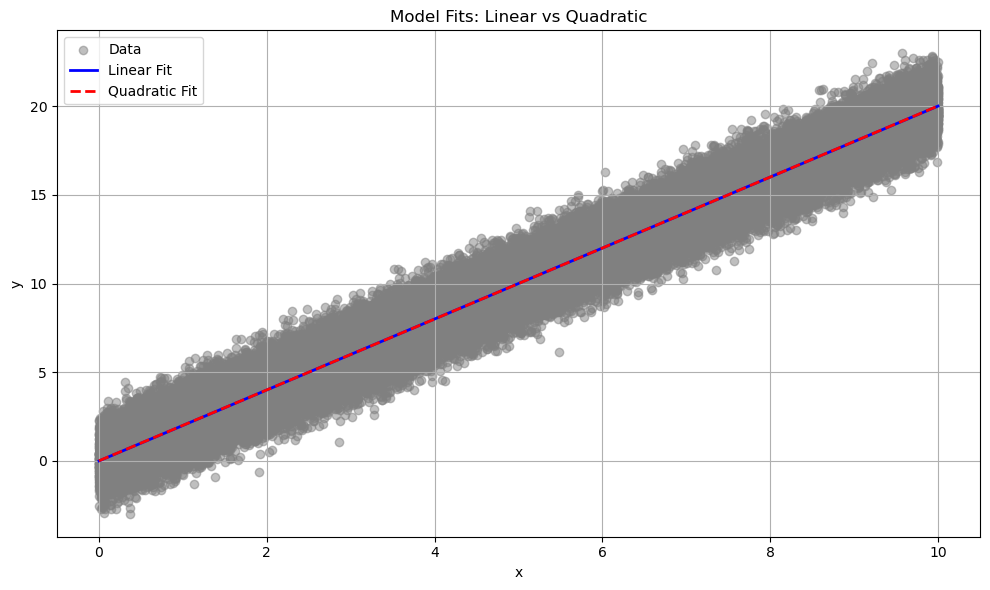

In [4]:
# Plot the data and the two model fits
plt.figure(figsize=(10, 6))
plt.scatter(x, y, label="Data", color="gray", alpha=0.5)

# Plot linear fit
plt.plot(x, y_pred_lin, label="Linear Fit", color="blue", linewidth=2)

# Plot quadratic fit
plt.plot(x, y_pred_quad, label="Quadratic Fit", color="red", linestyle="--", linewidth=2)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Model Fits: Linear vs Quadratic")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [5]:
# Step 1: Compute BIC for both models
def compute_bic(n, log_likelihood, num_params):
    return -2 * log_likelihood + num_params * np.log(n)

bic_lin = compute_bic(nsamples, logL_lin, k_lin)
bic_quad = compute_bic(nsamples, logL_quad, k_quad)

# Step 2: Estimate Bayes Factor using BIC approximation
# Kass & Raftery (1995): log(BF_12) ≈ (BIC_2 - BIC_1) / 2
log_BF_12_bic = (bic_quad - bic_lin) / 2
BF_12_bic = np.exp(log_BF_12_bic)
print('Bayes factor estimated with BIC: {}'.format(BF_12_bic))
print('Log Bayes factor estimated with BIC: {}'.format(log_BF_12_bic))

Bayes factor estimated with BIC: 177.84748741699954
Log Bayes factor estimated with BIC: 5.180926370754605


In [6]:
# import numpy as np
# import pymc as pm
# import arviz as az
# import matplotlib.pyplot as plt

# # Simulate large dataset (same as before)
# np.random.seed(0)
# x = np.linspace(0, 10, 10000)
# y = 2 * x + np.random.normal(0, 1, size=10000)

# # Linear model in PyMC
# with pm.Model() as linear_model:
#     a = pm.Normal("a", mu=0, sigma=10)
#     b = pm.Normal("b", mu=0, sigma=10)
#     sigma = pm.HalfNormal("sigma", sigma=5)
#     mu = a * x + b
#     y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)
#     trace_linear = pm.sample(1000, tune=1000, return_inferencedata=True, target_accept=0.95)
#     logml_linear = az.log_marginal_likelihood(linear_model, trace_linear, method="bridge")

# # Quadratic model in PyMC
# with pm.Model() as quad_model:
#     a = pm.Normal("a", mu=0, sigma=10)
#     b = pm.Normal("b", mu=0, sigma=10)
#     c = pm.Normal("c", mu=0, sigma=10)
#     sigma = pm.HalfNormal("sigma", sigma=5)
#     mu = a * x + b * x**2 + c
#     y_obs = pm.Normal("y_obs", mu=mu, sigma=sigma, observed=y)
#     trace_quad = pm.sample(1000, tune=1000, return_inferencedata=True, target_accept=0.95)
#     logml_quad = az.log_marginal_likelihood(quad_model, trace_quad, method="bridge")

# # Compute Bayes Factor using bridge sampling
# log_bf_12 = logml_linear - logml_quad
# bf_12 = np.exp(log_bf_12)

# print("Log Marginal Likelihood (Linear):", logml_linear)
# print("Log Marginal Likelihood (Quadratic):", logml_quad)
# print("Log Bayes Factor (M1 vs M2):", log_bf_12)
# print("Bayes Factor (M1 vs M2):", bf_12)
